<a href="https://colab.research.google.com/github/okwasna/dane_wszystkie/blob/main/dane_wszystkie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


Liczba genów przed filtrowaniem: 28677


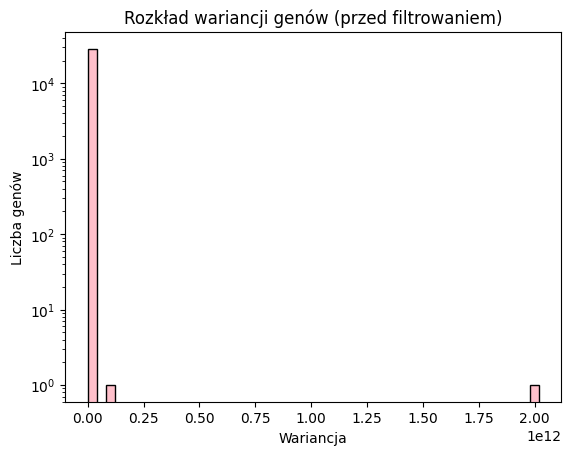

Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')
# Wyświetlenie liczby wszystkich genów przed filtrowaniem
print(f"Liczba genów przed filtrowaniem: {len(df)}")

# Histogram pierwotnego rozkładu wariancji (przed filtrowaniem)
plt.hist(df['var'], bins=50, color='pink', edgecolor='black')
plt.title('Rozkład wariancji genów (przed filtrowaniem)')
plt.xlabel('Wariancja')
plt.ylabel('Liczba genów')
plt.yscale('log')
plt.show()

# Krok 1: Filtrowanie genów o niskiej wariancji
# Ustalmy próg wariancji na 10 - odrzucamy geny poniżej tej wartości
variance_threshold = 10

# Filtrowanie genów o wariancji poniżej progu
df_filtered = df[df['var'] >= variance_threshold]

# Zliczenie ilości genów dla lncRNA przed filtrowaniem
initial_counts = df['lncRNA'].value_counts()

# Zliczenie ilości genów dla lncRNA po filtrowaniu
filtered_counts = df_filtered['lncRNA'].value_counts()

# Obliczenie liczby usuniętych genów z lncRNA 0 i 1
removed_counts = initial_counts - filtered_counts

# Wyświetlenie liczby usuniętych genów osobno dla lncRNA = 0 i lncRNA = 1
removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

# Wyświetlenie łącznej liczby genów po filtrowaniu
total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")
